# Find Best ML Model To Predict Popularity Of Spotify Musics

### Introduction
The following python code, which consist from most famous python Libraries in machin learning researchs, aim to compare some of popular ML model to predict the popularity of spotify musics.
the main tree Model which are investigated here are:
1.Linear Regression
2.Desicion Tree
3.Random Forest

### download and import main libraries to python environment

In [105]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Data

The data for this project originates from a Kaggle dataset. Each observation represents an individual song. In the original dataset, there are approximately more than 1 Million rows and 17 columns, though there were some modifications that are discussed in the next section, Exploring the Data. The majority of the features consist of numerical values providing a score on various musical qualities including: loudness, instrumentalness, danceability, liveness and other similar descriptors. Other columns consist of simple string objects, some of which were dropped. Finally, the last column, the target column, lists a popularity score between 0 and 100 for each song. Here's a sample of how the data is structured.

In [124]:
spotify = pd.read_csv('spotify_data.csv')


# Create the sorted dataframe
sort_data = spotify.sort_values('popularity', ascending=False).reset_index()
spotify_ordered = sort_data.drop(['index', 'track_id','genre'], axis=1)
spotify_ordered.index = spotify_ordered.index + 1

#  drop zeros from our DataSet
spotify_ordered = spotify_ordered[spotify_ordered.popularity > 0]


# spotify_ordered.head()

### Visualization
Now that the data is loaded and shaped, it's important to get an understanding of the different variables, in particular the target variable. First, here's a plot to visualize the distribution of the target variable values.

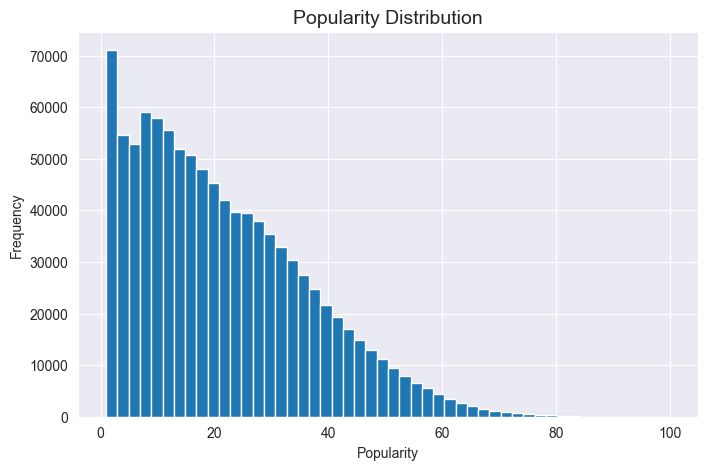

In [108]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = spotify_ordered['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

##  statistical moments for the popularity column.

In [109]:
spotify_ordered[['popularity']].describe()


,popularity
count,1.001373e+06
mean,2.129085e+01
std,1.517754e+01
min,1.000000e+00
25%,9.000000e+00
50%,1.800000e+01
75%,3.100000e+01
max,1.000000e+02


Even with the zero values dropped, the popularity scores are heavily weighted towards the bottom of the scale, and the distribution tapers off severely as it moves towards the higher popularity values. To study this dynamic further, we can look at the statistical moments for the popularity column.
From the above we can see the low measures of centrality. The mean and median are both in the 20s and the IQR only extends to 41. Even songs of a medium popularity as defined in the classified dataset would be fairly rare. 

## Correlations

Having examined the target variable, we can now examine the rest of the features and see how they correlate with each other, in particular how they correlate with the popularity column.



In [110]:
spotify_ordered.corr()


,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Unnamed: 0,1.000000,-0.180029,-0.515492,-0.025294,0.001764,0.003502,-0.008456,0.020578,-0.018954,0.008038,-0.017159,0.015764,0.069089,-0.001732,0.039895,0.000370
popularity,-0.180029,1.000000,0.330474,0.128300,-0.005227,0.002968,0.089483,-0.029699,-0.035673,-0.048313,-0.143145,-0.076398,-0.004357,0.000062,-0.118347,0.027100
year,-0.515492,0.330474,1.000000,0.044924,0.005772,-0.003703,0.016963,-0.030933,0.031124,-0.012113,0.035994,-0.021036,-0.104189,0.017283,-0.087225,0.001949
danceability,-0.025294,0.128300,0.044924,1.000000,0.131769,0.030002,0.262387,-0.053428,0.089268,-0.162568,-0.207397,-0.113480,0.525106,-0.033472,-0.055442,0.178899
energy,0.001764,-0.005227,0.005772,0.131769,1.000000,0.037817,0.784381,-0.056947,0.121568,-0.751262,-0.219758,0.199459,0.257497,0.262902,0.006074,0.173244
key,0.003502,0.002968,-0.003703,0.030002,0.037817,1.000000,0.027732,-0.163631,0.013109,-0.033328,-0.004350,-0.004324,0.027432,0.008739,0.006534,0.010424
loudness,-0.008456,0.089483,0.016963,0.262387,0.784381,0.027732,1.000000,-0.021836,0.025995,-0.633849,-0.431553,0.094644,0.300634,0.234755,-0.049333,0.176463
mode,0.020578,-0.029699,-0.030933,-0.053428,-0.056947,-0.163631,-0.021836,1.000000,-0.023164,0.071922,-0.055933,0.025091,0.015917,-0.004954,-0.040358,-0.018394
speechiness,-0.018954,-0.035673,0.031124,0.089268,0.121568,0.013109,0.025995,-0.023164,1.000000,0.034125,-0.147003,0.287557,0.041276,-0.034756,-0.066919,-0.032244
acousticness,0.008038,-0.048313,-0.012113,-0.162568,-0.751262,-0.033328,-0.633849,0.071922,0.034125,1.000000,0.137653,-0.038565,-0.117523,-0.237614,-0.059623,-0.170758


### Heatmap of the correlation table for better visualization

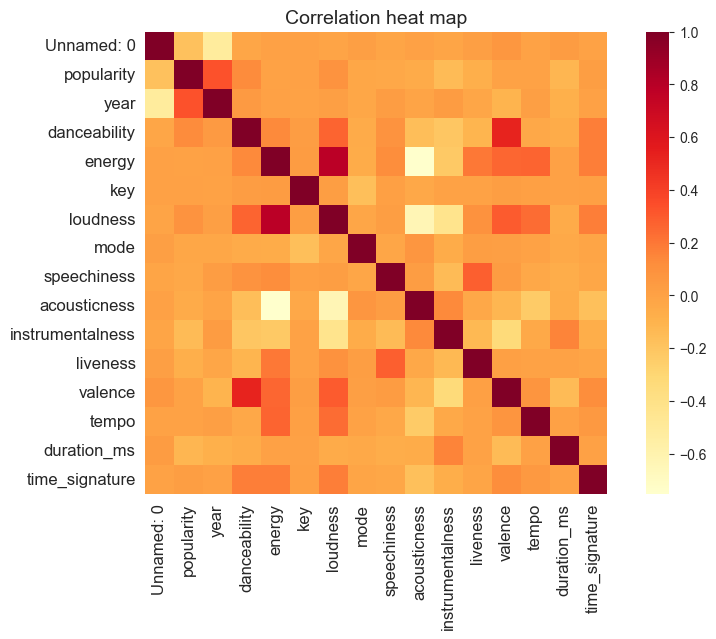

In [111]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.heatmap(spotify_ordered.corr(), square=True, cmap='YlOrRd')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

From the above chart and heatmap, the correlations are mostly pretty weak. Energy, loudness and danceability have fairly strong relationships, which makes sense, and acousticness is naturally opposed to loudness and energy, but there's not much to go on outside of those. Unfortunately, this trend appears to hold true for the popularity variable. The correlation between loudness and popularity looks positive, but it would be nice to have a dependent variable that strongly relates to the target variable.



## Modeling
This sections outlines the steps used to find the best algorithm for predicting popularity

### Linear Regression


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set random state
state=25

# Shuffle the data
reg_data = spotify_ordered.sample(frac=1, random_state=state).reset_index(drop=True)

# First, try without categoricals
X = reg_data.select_dtypes(include='number').drop('popularity', axis=1)
y = reg_data.popularity

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

Now that the data has been split with train_test_split, we can fit the training data and calculate the R2 score. This process, and all the similar ones to follow, is timed to get an understanding of the computational requirements for each model.



In addition to the standard R2 score, I also created a custom loss function to give a more concrete perspective on the model performance. This function, `custom_loss`, calculates counts for different levels of error between the predicted values and the actual test values, and also gives an overall average of the differences between predicted and actual.

In [129]:
def custom_loss(prediction, actual):
    paired = zip(prediction, actual)
    listed = list(paired)
    diffs = {'Under five': 0, 'Five to ten': 0, 'Over ten': 0, 'Average error': 0}
    sum = 0

    for pair in listed:
        sum += abs(pair[0] - pair[1])
        if abs(pair[0] - pair[1]) < 5:
            diffs['Under five'] += 1
        elif 5 <= abs(pair[0] - pair[1]) < 10:
            diffs['Five to ten'] += 1
        else:
            diffs['Over ten'] += 1
            
    diffs['Average error'] = sum / len(listed)
     
    return diffs

In [130]:
%%time

linreg = LinearRegression()
linreg.fit(X_train, y_train)

lin_pred = linreg.predict(X_test)

print(linreg.score(X_test, y_test))

custom_loss(lin_pred, y_test)


0.16584450272781492
CPU times: total: 1.06 s
Wall time: 764 ms


{'Under five': 65312,
 'Five to ten': 63638,
 'Over ten': 121394,
 'Average error': 11.122593656682483}

The score for the model above is not very good. On the other hand, the custom metric isn't as bad as the score would lead one to believe. There may be over 121000 predictions well off the mark, but a good many were reasonably accurate, and the average difference isn't terrible.

## Classification

### Adding a new column
The linear regression models were ineffective, so we eventually decided to tackle this problem using a classification approach. To do so, we split the observations into three classes based on the popularity scores: unpopular for scores up to 50, medium for 51 to 74, and popular for 75 and above.
Below is the code to set up and inspect the new column specifying the labels.

In [107]:
classified = spotify_ordered.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score
    
    
# Inspect the new column
# classified[['track_name', 'popularity', 'pop_rating']].head(3)

### Class counts

The different classes in the classified dataset exhibit a high level of imbalance. This needs to be accounted for in order to ensure the models perform as well as possible. Here's a visualization of the disparity.




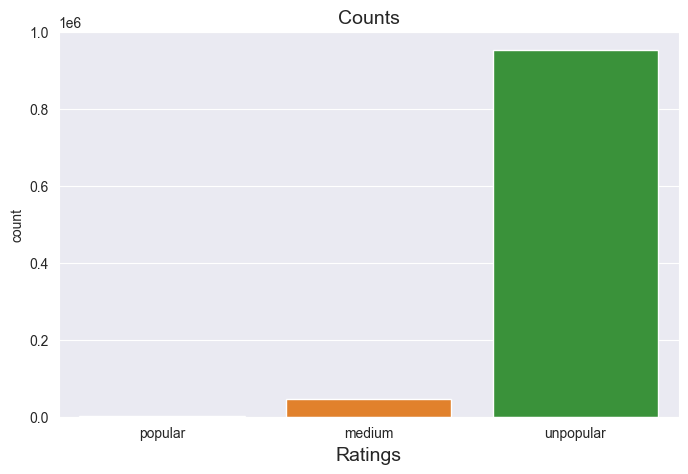

In [115]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

Next, we create a separate dataframe with all the observations for each label, and then split each of those into train and test splits. All of the training splits and then all of the test splits are then stitched together so that all labels are represented in the data. Importantly, the popularity column is dropped completely to ensure that it is not included as a training feature.



In [137]:
from sklearn.model_selection import train_test_split

df_pop = df[df.pop_rating == 'popular']

df_med = df[df.pop_rating == 'medium']

df_unpop = df[df.pop_rating == 'unpopular']

# Set random seed
state=25

X_tr_p, X_ts_p, y_tr_p, y_ts_p = train_test_split(df_pop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_pop.pop_rating, test_size=0.15, random_state=state)

X_tr_m, X_ts_m, y_tr_m, y_ts_m = train_test_split(df_med.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_med.pop_rating, test_size=0.15, random_state=state)

X_tr_up, X_ts_up, y_tr_up, y_ts_up = train_test_split(df_unpop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_unpop.pop_rating, test_size=0.15, random_state=state)


df.head()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pop_rating
1,612503,100,2023,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4,popular
2,605178,96,2023,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,218289,4,popular
3,612504,95,2023,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,232857,4,popular
4,569184,94,2022,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,4,popular
5,569195,93,2022,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,162638,4,popular


In [138]:
pop_train = pd.concat([X_tr_p, y_tr_p], axis=1)
med_train = pd.concat([X_tr_m, y_tr_m], axis=1)
unpop_train = pd.concat([X_tr_up, y_tr_up], axis=1)

training = pd.concat([pop_train, med_train, unpop_train], axis=0)

training = training.sample(frac=1, random_state=state).reset_index(drop=True)

# Popularity has been removed, so only 30 columns
# training.head()
training.shape

(851166, 16)

The same process above is now executed with the final test data.



In [134]:
pop_test = pd.concat([X_ts_p, y_ts_p], axis=1)
med_test = pd.concat([X_ts_m, y_ts_m], axis=1)
unpop_test = pd.concat([X_ts_up, y_ts_up], axis=1)

final_test = pd.concat([pop_test, med_test, unpop_test], axis=0)

final_test = final_test.sample(frac=1, random_state=state).reset_index(drop=True)

final_test.shape

(150207, 16)

## Train and validation sets

Before actually diving into the models, the training data needs to be further split into training and validation sets to allow testing without using the final test set.




In [135]:
X_class = training.drop('pop_rating', axis=1)
y_class = training.pop_rating

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.25, random_state=state)

## Desicion Tree 

To start off simple, we first ran a basic decision tree classifier. 


In [136]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Basic decision tree
dt = DecisionTreeClassifier(max_depth=20, random_state=state)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

print(accuracy_score(pred, y_test))

0.9480901537651791
CPU times: total: 28.2 s
Wall time: 28.6 s


## Random Forest

Taking the tree models a step further, we next ran Random Forest.



In [38]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=state)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print(accuracy_score(rf_pred, y_test))

0.9533582089552238
CPU times: total: 10min 11s
Wall time: 10min 20s


Below is a chart ranking the features in level of importance for the random forests model.



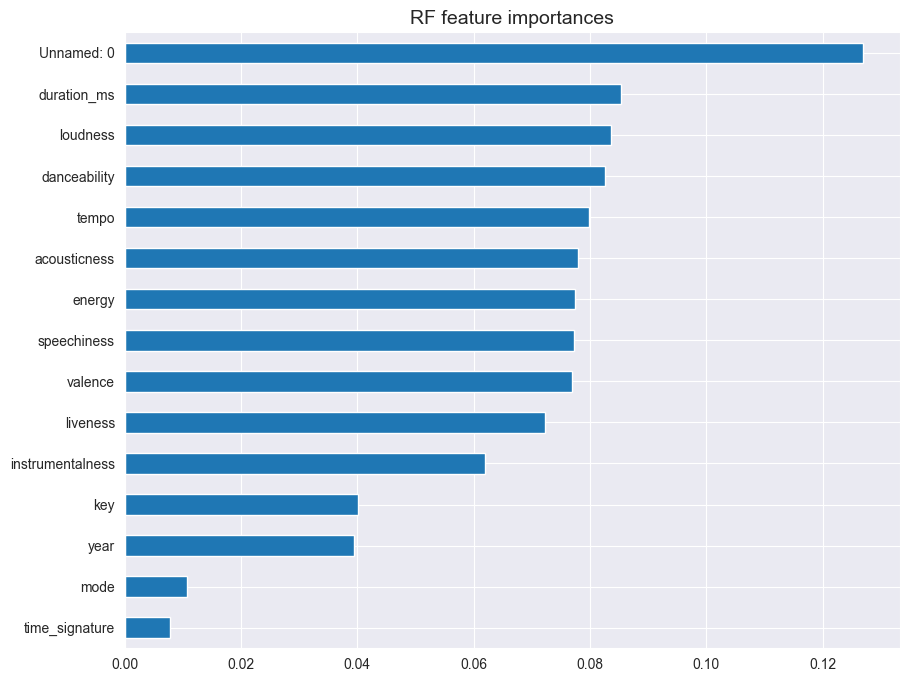

In [121]:
important = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values()

fig = plt.subplots(figsize=(10,8))
_ = important.plot(kind='barh')
_ = plt.title('RF feature importances', fontsize=14)

As the table indicated, duration and loudness are the most important variable, followed by danceability. Somewhat surprising is that duration is ranked so highly. However, popular songs do tend to be of similar durations, and very long songs might hinder repeat listens, so it seems plausible that duration is important. 

## Conclusions

For the regression algorithms, there isn't much accuracy in any case. As for the classification models, the difference depends on the metric. When it comes to basic accuracy they all performed more or less the same. The random forest model is slightly more precise than the rest,althoug it takes so much time to execute. Based on the results above, I think it's clear that the Random Forest model is the best choice.